In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn

In [2]:
df = pd.read_csv ('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz

C:\Users\cagat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


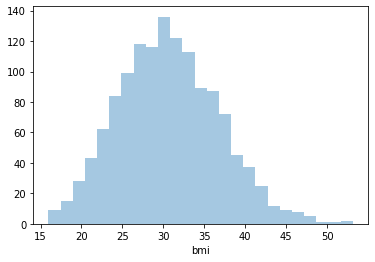

In [17]:
sns.distplot(df.bmi, kde = False);


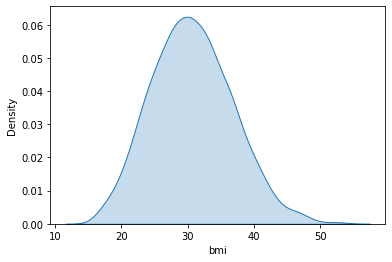

In [11]:
sns.kdeplot(df.bmi, shade = True);

## “smoker” ile “charges” arasındaki ilişkiyi inceleyiniz

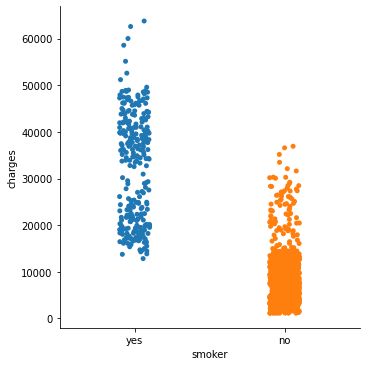

In [19]:
sns.catplot(x = df.smoker, y = df.charges, data = df);

## “smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.


In [25]:
df.smoker

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object